# Рынок заведений общественного питания Москвы

- Автор: Лаптева Диана
- Дата: 07.12.2024

### Цель проекта

<font color='#777778'>Исследовать рынок заведений общественного питания в Москве, чтобы предоставить инвесторам информацию, которая поможет выбрать наиболее подходящий формат заведения и определить его расположение, ценовую политику и целевую аудиторию.</font>

### Задачи проекта

<font color='#777778'> 
    
- Проанализировать текущее состояние рынка
    
- Проанализировать потребительские предпочтения
    
- Обработка и предобработка данных
    
- Выявление перспективных развитий</font>

### Описание данных

<font color='#777778'>

В проекте будут использованны данные датасета `rest_info.csv` со следующим описанием:
    
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым.
- `seats` — количество посадочных мест.
    
    
Также будет использован датасет `rest_price.csv` с описанием:
    
- `price` — категория цен в заведении;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`.</font>

### Содержимое проекта

<font color='#777778'>

1. [Загрузка и знакомство с данными.](#1-bullet)
2. [Предобработка данных.](#2-bullet)
3. [Исследовательский анализ данных.](#3-bullet)
4. [Детальное исследование пиццерий.](#4-bullet)
5. [Итоговый вывод и рекомендации](#5-bullet)
</font>

---

<a class="anchor" id="1-bullet"></a>
## 1. Загрузка данных и знакомство с ними

Импотируем все необходимые библиотеки. Будем использовать `pandas` и библиотеки визуалицазии данных `matplotlib`, `seaborn` и `phik` для построения матрицы корреляции.

In [161]:
#Установим phik
!pip install phik
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

Загрузим датасеты `/datasets/rest_info.csv`, `/datasets/rest_price.csv`

In [162]:
# Выгружаем данные из датасета rest_info.csv в датафрейм rest_info
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [163]:
# Выгружаем данные из датасета rest_price.csv в датафрейм rest_price
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Выведем основную информацию о данных с помощью метода `info()` и первые строки датафреймов, используя `head()`.

Сначала изучим датафрейм `rest_info`

In [164]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [165]:
# Выводим первые строки датафрейма
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Теперь рассмотрим датафрейм `rest_price`

In [166]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [167]:
# Выводим первые строки датафрейма 
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Датасет `rest_info.csv` содержит 9 столбцов и 6406 строк, в которых содержится информация о заведениях общественного питания Москвы.

После первичного анализа можно сделать следующие выводы:
- Названия столбцов написаны в едином стиле.
- Столбцы с количественными данными хранятся в типах `float64' и  'int64`. Значения в стобце `chain` показывают является или нет заведение сетевым - размерность этих данных можно оптимизировать. Значения в столбцах с качественными данными хранятся в типе `object`.
- Пропуски содержатся в следующих столбцах: `hours`, `seats`. Другие столбцы необходимо проверить, так как в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Исходя из первичного знакомства с данными, значения в столбцах соответствуют описанию.

Теперь рассмотрим датасет `rest_info.csv`. Он содержит 5 столбцов и 4058 строк, в которых содержится информация о среднем чеке в заведениях общественного питания.

После первичного анализа можно сделать следующие выводы:
- Названия столбцов написаны в едином стиле.
- Столбцы с количественными данными хранятся в типах `float64`. Значения в столбцах с качественными данными хранятся в типе `object`.
- Пропуски содержатся в следующих столбцах: `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Другие столбцы необходимо проверить, так как в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Исходя из первичного знакомства с данными, значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что в данных достаточно много пропущенных значений. Однако сами данные соответствуют описанию и выгоялят корректными.

### Подготовка единого датафрейма

Для дальнейшего анализа нам потребуется полная информация о заведениях. С помощью `merge()` объединим данные двух датасетов в один. Далее будем работать с ним.

In [168]:
# Объединим датасеты
rest_moscow = rest_info.merge(rest_price, how='outer', on='id')

Выведем основную информацию о данных с помощью метода `info()` и первые строки датафреймов, используя `head()`.

In [169]:
rest_moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [170]:
rest_moscow.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Датасет `rest_moscow.csv` содержит 13 столбцов и 8406 строк, в которых содержится информация о заведениях общественного питания Москвы и о среднем чеке.

- Названия столбцов написаны в едином стиле.
- Столбцы с количественными данными хранятся в типах `float64` и  `int64`. Значения в стобце `chain` показывают является или нет заведение сетевым - размерность этих данных можно оптимизировать. Значения в столбцах с качественными данными хранятся в типе `object`.
- Пропуски содержатся в следующих столбцах: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Другие столбцы необходимо проверить, так как в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Значения в столбцах соответствуют описанию.

<a class="anchor" id="2-bullet"></a>
## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Для начала ознакомимся с типами данных датафрейма и оптимизируем их.

In [171]:
rest_moscow.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Все данные имеют характерный тип, однако некоторые из них можно оптимизировать. 
Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [172]:
# Оптимизируем целочисленный тип данных в датафрейме rest_moscow
rest_moscow['chain'] = pd.to_numeric(rest_moscow['chain'], downcast='integer')

In [173]:
# Проверим типы данных в датафрейме rest_moscow с помощью атрибута dtypes
rest_moscow.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

Изучим пропуски в данных. Для этого:
- Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.
- Изучим данные с пропущенными значениями.
- Обработаем пропущенные значения. 

In [174]:
# количество пропусков
print(rest_moscow.isna().sum()) 
# доля пропусков
print(rest_moscow.isna().sum() / len(rest_moscow)) 

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64


Анализ пропусков:

- `hours` (6.4% пропусков): Эти пропуски могут быть вызваны отсутствием информации на момент сбора данных. Можно оставить пропуски, так как доля небольшая.

- `seats` (42.9%): Вероятно, информация о количестве мест не была указана для многих заведений. Нам важна точность данных, поэтому пропуски оставим как есть, ибо замена пропусков на медиану/моду может сильно исказить данные.

- `price` (60.5%) и `avg_bill` (54.6%): Пропуски могут быть связаны с отсутствием информации о ценах. Можно заменить их значением "не указано". Иные способы не подойдут, так как у всех заведений разный ценовой сегмент/ассортимент и замена пропусков может сделать наши данные некорректными.

- `middle_avg_bill` (62.5%) и `middle_coffee_cup` (93.6%): Эти столбцы зависят от текста в `avg_bill`. Пропуски нужно оставить, так как они информируют об отсутствии указанного диапазона цен.

In [175]:
# Обработка пропусков
rest_moscow['hours'] = rest_moscow['hours'].fillna("не указано")
rest_moscow['price'] = rest_moscow['price'].fillna("не указано")
rest_moscow['avg_bill'] = rest_moscow['avg_bill'].fillna("не указано")
# Пропуски в seats,  middle_avg_bill и middle_coffee_cup оставляем

In [176]:
# Проверяем результат
print(rest_moscow.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


Причины возникновения пропусков могут буть следующими:

- `hours`: у некоторых заведений информация о времени работы может отсутствовать в общедоступных источниках или не была добавлена пользователями, также заведения могут быть временно закрыты.

- `seats`: не все заведения публикуют информацию о количестве мест, особенно если это небольшие кафе или кофейни.

- `price`: отсутствие ценовой информации на момент сбора данных или заведение могло быть недавно открыто, и данные о ценах еще не внесены.

- `avg_bill`: не все заведения публикуют данные о среднем чеке, особенно если цены сильно колеблются.

- `middle_avg_bill` и `middle_coffee_cup`:эти данные рассчитываются на основе столбца `avg_bill`, поэтому пропуски в `avg_bill` автоматически создают пропуски в этих столбцах. Также если в `avg_bill` указаны только данные, не начинающиеся с "Средний счёт" или "Цена чашки капучино", то соответствующие значения не были рассчитаны.

На данном этапе изучим дубликаты.

- Проверим наличие явных дубликатов.
- Проверим, встречаются ли в данных неявные дубликаты, связанные с опечатками или разным способом написания.
- Проведем нормализацию данных с текстовыми значениями. 
- Устраним неявные дубликаты, проверим наличие явных дубликатов в данных.

In [177]:
# Проверим количество дубликатов
duplicates_count = rest_moscow.duplicated().sum()
print(f'Количество явных дубликатов: {duplicates_count}')

Количество явных дубликатов: 0


In [178]:
# Нормализуем данные с текстовыми значениями
for col in ['name', 'address', 'avg_bill']:
    rest_moscow[col] = rest_moscow[col].str.lower()

In [179]:
# Заменяем точки на пробелы в столбце name
rest_moscow['name'] = rest_moscow['name'].str.replace('.', ' ', regex=False)

In [180]:
# Изучим неявные дубликаты
rest_moscow.loc[rest_moscow.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,не указано,не указано,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,не указано,не указано,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,не указано,не указано,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,не указано,не указано,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,не указано,не указано,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,не указано,не указано,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,не указано,не указано,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,не указано,4.1,0,276.0,не указано,не указано,NaN,NaN


In [181]:
# Удалим неявные дубликаты
rest_moscow.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True)

Проверим, есть ли в данных заведения, которые являются сетевыми, но в столбце chain стоит 0:

In [182]:
rest_moscow.query('chain == 0')['name'].count()

5199

In [183]:
# создадим список названий сетевых заведений
chain_names = list(rest_moscow.query('chain == 1')['name'].unique())

# вернем значение 1 заведениям, являющимся сетевыми
for name in chain_names:
    rest_moscow.loc[(rest_moscow['chain'] == 0) & (rest_moscow['name'] == name), 'chain'] = 1

In [184]:
rest_moscow.query('chain == 0')['name'].count()

5154

Избавились от 45 пропусков.

In [185]:
# Посчитаем количество удаленных строк
# Первоначальное количество строк
initial_row_count = 8406

# Текущее количество строк
current_row_count = len(rest_moscow)

# Разница
deleted_rows = initial_row_count - current_row_count
deleted_percentage = (deleted_rows / initial_row_count) * 100

print(f'Удалено строк: {deleted_rows} ({deleted_percentage:.2f}%)')

Удалено строк: 4 (0.05%)


Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно,который будет принимать:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [186]:
def create_is_na(x):
    if x == 'ежедневно, круглосуточно':
        return 0
    return 1

In [187]:
rest_moscow['is_24_7'] = rest_moscow['hours'].isna().apply(create_is_na)

In [188]:
# Выведем обновленную таблицу
rest_moscow

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,не указано,не указано,NaN,NaN,1
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,1
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,средний счёт:от 1000 ₽,1000.0,NaN,1
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,не указано,цена чашки капучино:155–185 ₽,NaN,170.0,1
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,средний счёт:400–600 ₽,500.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,не указано,не указано,NaN,NaN,1
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,не указано,не указано,NaN,NaN,1
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,не указано,средний счёт:от 150 ₽,150.0,NaN,1
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,не указано,не указано,NaN,NaN,1


---

### Промежуточный вывод

Предобработка завершена.

- В результате предобработки были обнаружены пропуски в столбцах: `hours` (6.4% пропусков), `seats` (42.9%), `price` (60.5%), `avg_bill` (54.6%), `middle_avg_bill` (62.5%), `middle_coffee_cup` (93.6%). Количество пропусков достаточно велико, следовательно, они, вероятно связаны отстутсвием информацией в общем доступе, чем с ошибками в заполнении данных. Поэтому оставляем их без изменений.

- Проверили данные на явные и неявные дубликаты. Явных дубликатов не обнаружено. Всего было удалено 4 строки (0.05%).

- Был создан новый столбец `is_24_7`, чтобы проще было выяснить является ли заведение открытым ежедневно и круглосуточно.

<a class="anchor" id="3-bullet"></a>
## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [189]:
# Создадим датафрейм с количеством заведений в каждой категории
category_rest_moscow = rest_moscow.groupby('category')['name'].count().reset_index()
category_rest_moscow.columns = ['category', 'count_places']

# Создадим столбец с долей каждой заведений каждой категории от общего числа
category_rest_moscow['proportion'] = round(category_rest_moscow['count_places'] / category_rest_moscow['count_places'].sum() * 100, 2)
category_rest_moscow.sort_values(by='proportion', ascending=False)

,category,count_places,proportion
3,кафе,2376,28.28
6,ресторан,2042,24.30
4,кофейня,1413,16.82
0,"бар,паб",764,9.09
5,пиццерия,633,7.53
2,быстрое питание,603,7.18
7,столовая,315,3.75
1,булочная,256,3.05


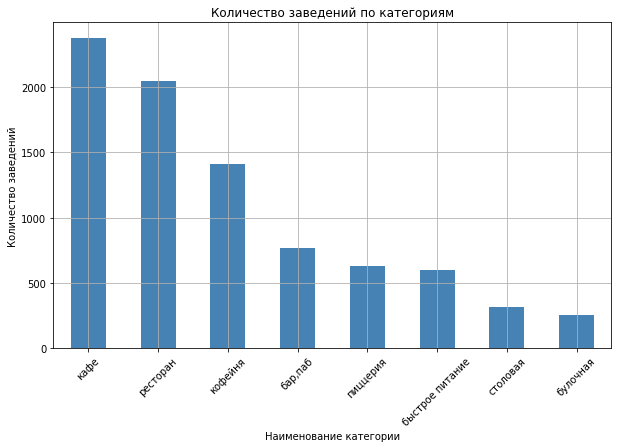

In [190]:
# Визуализация данных

rest_moscow['category'].value_counts().plot(kind = 'bar',
                    color = 'steelblue',
                    legend = False,
                    rot = 45,
                    title = 'Количество заведений по категориям',
                    xlabel = 'Наименование категории',
                    ylabel = 'Количество заведений',
                    figsize = (10,6))

# Добавляем сетку графика
plt.grid()
#Выводим график
plt.show()

**Вывод:** значительную долю всех заведений общественного питания в Москве составляют кафе и рестораны. Наименее распростарненными являются столовые и булочные, всего 3-4%. 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

Создадим график для распределения количества заведений по административным районам Москвы.

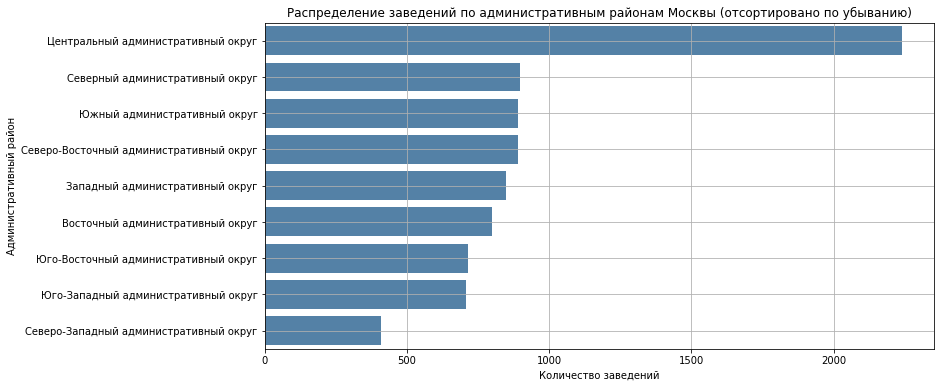

In [191]:
district_counts = rest_moscow['district'].value_counts().sort_values(ascending=False)

# Преобразуем данные в DataFrame 
district_data = district_counts.reset_index()
district_data.columns = ['district', 'count']

plt.figure(figsize=(12, 6))

sns.barplot(
    data=district_data, 
    y='district', 
    x='count', 
    color='steelblue')

plt.grid()

plt.title('Распределение заведений по административным районам Москвы (отсортировано по убыванию)')
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')

plt.show()

Создадим график распределения количества заведений в долях.

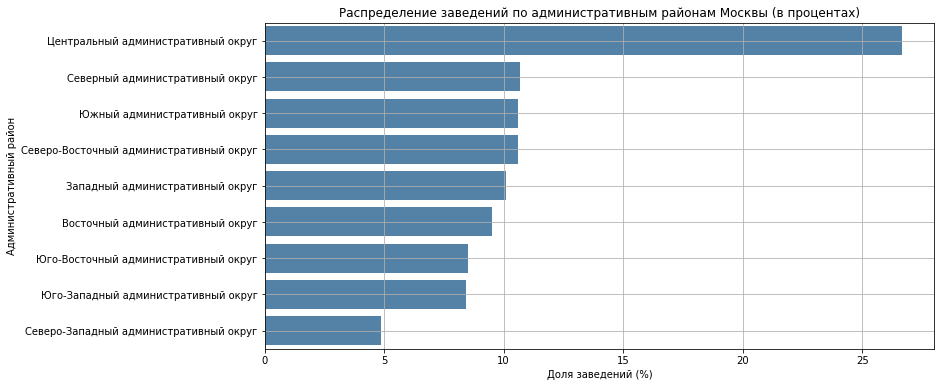

In [192]:
district_prop = rest_moscow['district'].value_counts(normalize=True).sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))
sns.barplot(
    y=district_prop.index, 
    x=district_prop.values,
    color='steelblue')

plt.grid()
plt.title('Распределение заведений по административным районам Москвы (в процентах)')
plt.xlabel('Доля заведений (%)')
plt.ylabel('Административный район')

plt.show()


**Вывод:** Наибольшее количество заведений располагается в Центральном административном округе. В Северном, Северо-Восточном, Западном и Южном административных округах приблизительно одинаковое количество заведений, однако все количество все равно отстает более чем в 2 раза от ЦАО. Наименьшее количество заведений располагается в Северо-Западном округе.

Создадим график для распределения количества заведений в Центральном административном округе Москвы.

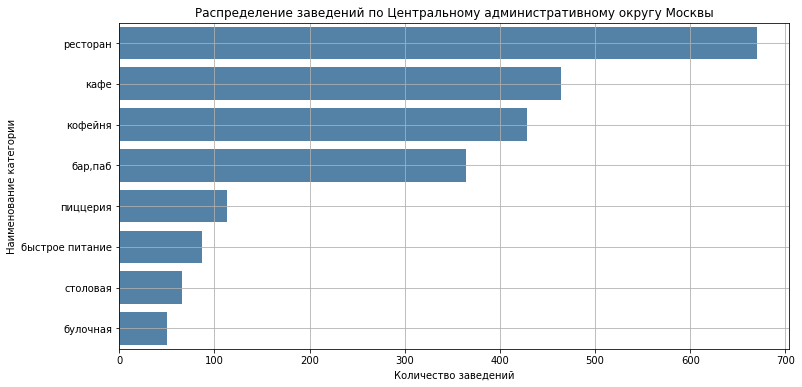

In [193]:
# Распределение категорий в ЦАО
central_rest = rest_moscow[rest_moscow['district'] == 'Центральный административный округ']

# Подсчитаем количество заведений по категориям и отсортируем по убыванию
category_counts = central_rest['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

plt.figure(figsize=(12, 6))

sns.barplot(data=category_counts, 
            y='category', 
            x='count', 
            color='steelblue')

plt.grid()

plt.title('Распределение заведений по Центральному административному округу Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Наименование категории')

plt.show()

Изучим распределение в долях.

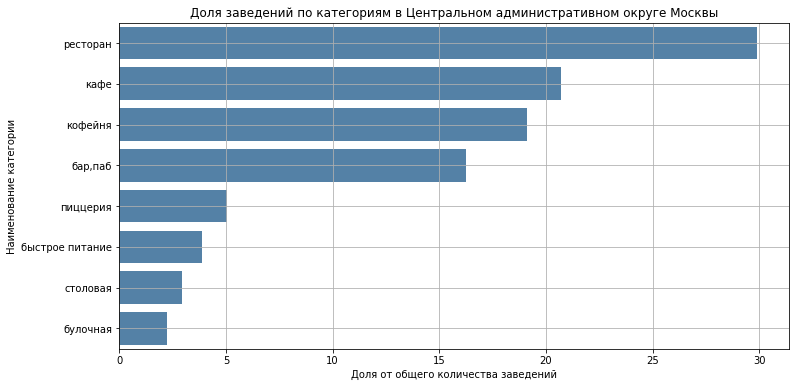

In [194]:
# Подсчитаем долю заведений по категориям
category_prop = (central_rest['category'].value_counts(normalize=True) * 100) 
category_prop = category_prop.reset_index()
category_prop.columns = ['category', 'share']

plt.figure(figsize=(12, 6))

sns.barplot(data=category_prop, 
            y='category', 
            x='share', 
            color='steelblue')

plt.grid()


plt.title('Доля заведений по категориям в Центральном административном округе Москвы')
plt.xlabel('Доля от общего количества заведений')
plt.ylabel('Наименование категории')

plt.show()


**Вывод:** В Центральном административном округе преобладает количество рестораном, кафе и кофеен, при этом булочных и столовых крайне мало. Вероятно это связано, что Центральный административный город, скорее, прогулочное место/место для встреч и развлечений, чем уютный домашний район, где были бы более популярны булочные.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

Посмотрим доли для сетевых и несетевых заведений по категориям.

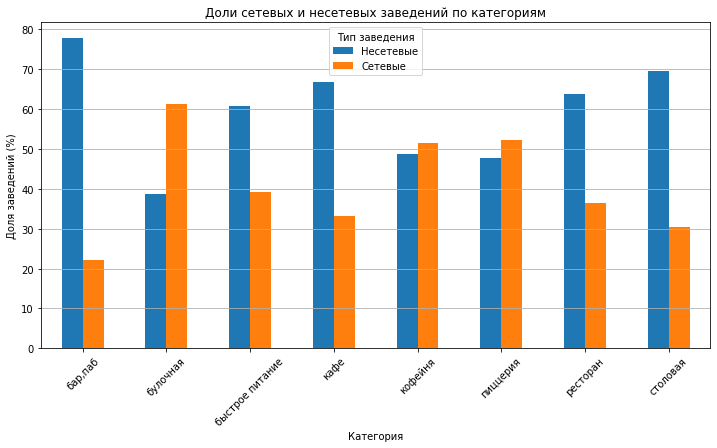

In [195]:
# Сгруппируем
rest_moscow_unstack = rest_moscow.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# Рассчитаем доли для сетевых и несетевых заведений по категориям
chain_prop = rest_moscow_unstack.div(rest_moscow_unstack.sum(axis=1), axis=0) * 100

chain_prop.plot(kind='bar', 
                figsize=(12, 6),
                xlabel='Категория',
                ylabel='Доля заведений (%)',
                title='Доли сетевых и несетевых заведений по категориям')

plt.xticks(rotation=45)
plt.legend(title='Тип заведения', labels=['Несетевые', 'Сетевые'])
plt.grid(axis='y')

plt.show()

Обратим внимание на соотношение сетевых и несетевых заведений по категориям.

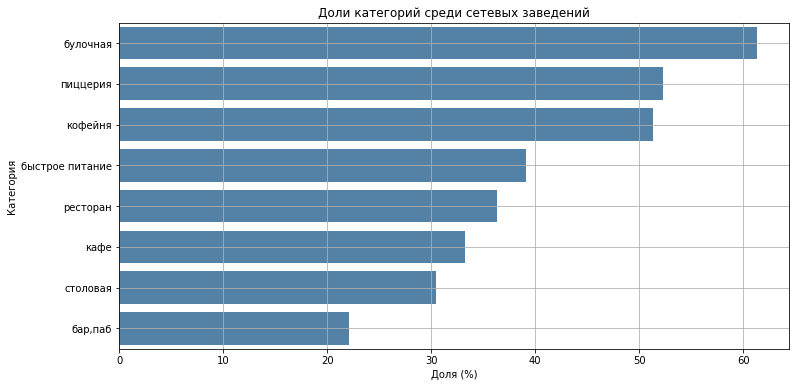

In [196]:
# Создадим датафрейм с количеством сетевых заведений каждой категории
category_chain = rest_moscow.query('chain == 1').groupby('category')['name'].count().reset_index()
category_chain.columns = ['category', 'chain_places']

# Создадим столбец с общим количеством заведений в категории
category_rest_moscow = rest_moscow.groupby('category')['name'].count().reset_index()
category_rest_moscow.columns = ['category', 'count_places']

# Добавим столбец с процентным соотношением сетевых заведений в каждой категории
category_chain = category_chain.merge(category_rest_moscow, on='category', how='left')
category_chain['proportion'] = round(category_chain['chain_places'] / category_chain['count_places'] * 100, 2)

# Сортируем категории по доле сетевых заведений
category_chain_sorted = category_chain.sort_values(by='proportion', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=category_chain_sorted, 
            x='proportion', 
            y='category', 
            color='steelblue')

plt.title('Доли категорий среди сетевых заведений')
plt.xlabel('Доля (%)')
plt.ylabel('Категория')
plt.grid()

plt.show()

Построим диаграмму для сетевых и несетевых заведений.

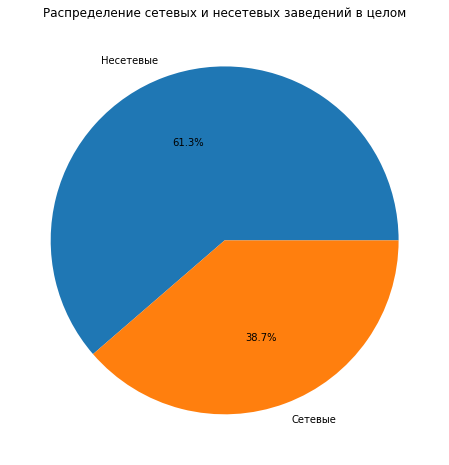

In [197]:
total_chain_counts = rest_moscow['chain'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(total_chain_counts, 
        labels=['Несетевые', 'Сетевые'], 
        autopct='%1.1f%%')

plt.title('Распределение сетевых и несетевых заведений в целом')
plt.show()

**Вывод:** 61% заведений являются несетевыми. Самое распространенное сетевые заведение - булочные, пиццерии и кофейни. Наименее распространенные - бары. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


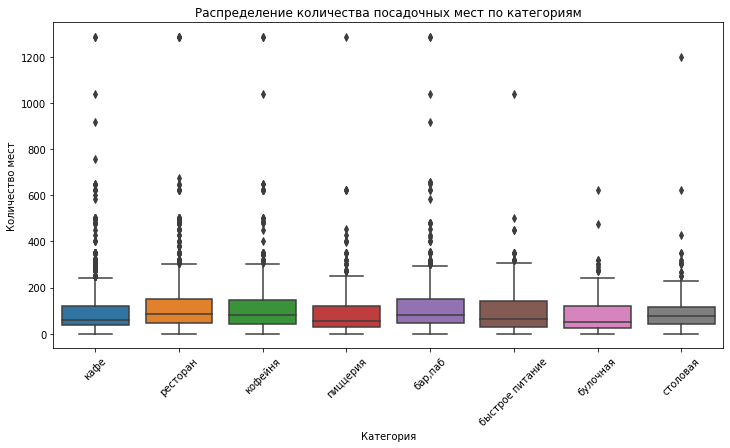

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [198]:
# Визуализация по категориям

plt.figure(figsize=(12, 6))

sns.boxplot(data=rest_moscow, 
            x='category', 
            y='seats')

plt.title('Распределение количества посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)

plt.show()

# Изучим статичтисечкие показатели столбца seats
rest_moscow['seats'].describe()

**Вывод:** В средней в заведениях около 108 посадочных мест. Высокий показатель стандартного отклоения (122) указывает на сильное разнообразие в размерах заведений. В половине заведений количество посадочных мест не превышает 75. Выбросы присутствуют практически во всех категориях, особенно в таких как рестораны, столовые и кафе. Это может быть связано со спецификой заведений: работа навынос, крупные заведения, проводящие массовые мероприятие, незаполненность данных.

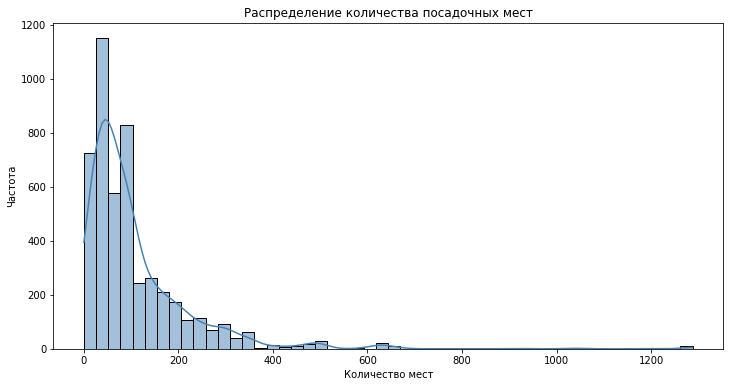

In [199]:
# Визуализация для общего распределения

plt.figure(figsize=(12, 6))

sns.histplot(data=rest_moscow,
             x='seats',
             bins=50,
             kde=True, 
             color='steelblue')

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Частота')

plt.show()

**Вывод:** Гистограмма имеет правосимметричное распределение. Большинство заведений имеют небольшое количество мест — до 50–100 мест. После 200 мест наблюдается сильное снижение частоты. Наиболее частое значение - 10-50 мест - это, скорее, характерно для булочный, кофеен и небольших кафе. По гистограмме размаха видно, что значения выше примерно 290 можно считать выбросами.

При анализе данных оставим все значения, поскольку если отбросить зведения с количеством свыше 290 посдачных мест, то можно исключить из анализа крупные заведения, подходящие, например, для проведения массовых мероприятий.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

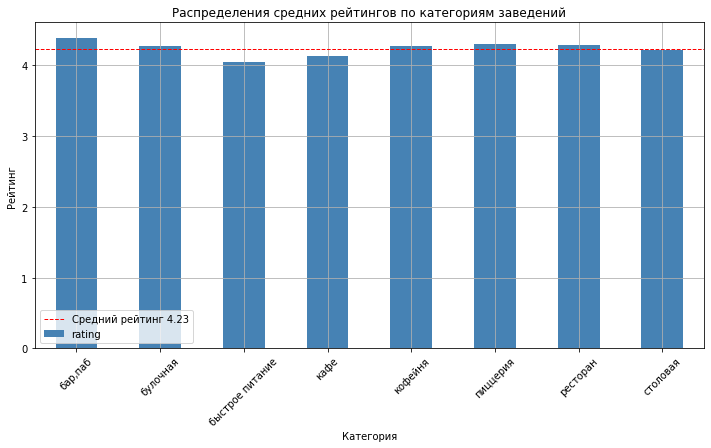

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268359,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124285,0.566001,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290402,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


In [200]:
# Построение графика распределения рейтинга
grouped = rest_moscow.groupby('category')['rating'].mean()
grouped.plot(kind = 'bar',
            title=f'Распределения средних рейтингов по категориям заведений',
            xlabel = 'Категория',
            ylabel = 'Рейтинг',
            rot=45,
            color='steelblue',
            figsize=(12,6))

# Рассчитаем среднее значение рейтинга
mean_rating = rest_moscow['rating'].mean()

# Нанесем на график линию со средним значением рейтинга

plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг {round(mean_rating,4)}')

plt.grid()
plt.legend()

plt.show()

# Описательная статистика по категориям
rest_moscow.groupby('category')['rating'].describe()

**Вывод:** Средний рейтинг по всем категориям заведений составляет 4.23. Ниже этого значения рейтинг имеют заведения быстрого питания и кафе, ровно это значение принимает рейтинг столовых. Бары и пабы имеют самый высокий средний рейтинг среди категорий - 4.39. Наименьший разброс значений у пиццерий (0.34) и кофеен (0.37)

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['chain', 'seats', 'middle_avg_bill', 'rating']


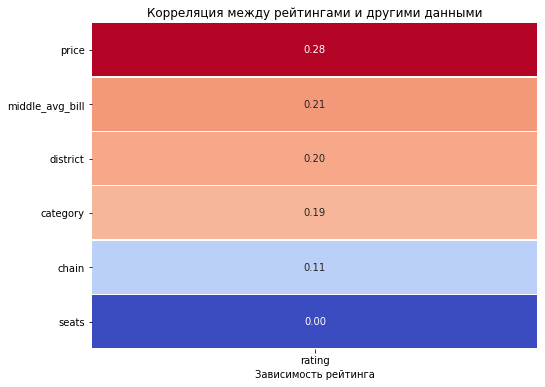

In [201]:
# Подготовка данных
correlation_rm = rest_moscow[['price', 'category', 'district', 'chain', 'seats', 
                              'middle_avg_bill', 'rating']].phik_matrix()

# Сохраняем матрицу корреляции признака rating с другими признаками
data_heatmap = correlation_rm.loc[correlation_rm.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

# Визуализация
plt.figure(figsize=(8, 6))

sns.heatmap(data_heatmap, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            linewidths=0.5,
            cbar=False)

plt.title('Корреляция между рейтингами и другими данными')
plt.xlabel('Зависимость рейтинга')

plt.show()

**Вывод:** Наиболее сильная корреляция наблюдается между рейтингом заведения и его ценовой категорией — коэффициент корреляции составляет 0.28. Вероятно это связано с тем, что заведения с более высокими ценами зачастую воспринимаются как более качественные. Однако, несмотря на это, корреляция остаётся относительно слабой, что говорит о наличии множества других факторов, влияющих на рейтинг.

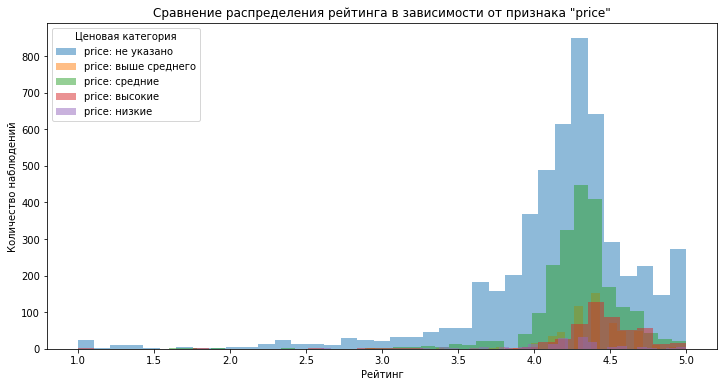

In [202]:
# Строим гистограмму распределения значений рейтинга
# Создаём фигуру графика
plt.figure(figsize=(12, 6))

# Строим гистограммы для каждого значения price
for i in rest_moscow['price'].unique():
    data = rest_moscow.loc[rest_moscow['price'] == i, 'rating'].dropna()
    
    # Строим гистограмму для данного значения рейтинга
    plt.hist(data, bins=37, alpha=0.5, label=f'price: {i}')

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределения рейтинга в зависимости от признака "price"')
plt.xlabel('Рейтинг')
plt.ylabel('Количество наблюдений')
plt.legend(title='Ценовая категория')
plt.show()

**Вывод:** Заведений с высоким рейтингом (ближе к 4.5) больше всего в категории с ценой выше среднего. У заведений с низкими ценами существует более выраженное распределение вокруг среднего рейтинга (около 3.5).

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [203]:
# Создадим сводную таблицу, в которой будет учитывать количество заведений в сети и средний рейтинг 
top_chains = rest_moscow[rest_moscow['chain'] == 1].pivot_table(
    index='name',
    values=['rating', 'id'],
    aggfunc={'rating': 'mean', 'id': 'count'}
).rename(columns={'id': 'count', 'rating': 'mean_rating'}).reset_index()

print(top_chains)

                  name  count  mean_rating
0      1-я креветочная      1     3.700000
1    10 идеальных пицц      3     4.300000
2             18 грамм      3     4.466667
3             4 сезона      1     4.700000
4          7 сэндвичей      4     3.975000
..                 ...    ...          ...
741          ян примус      3     4.533333
742       яндекс лавка     72     3.855556
743     японская кухня      4     4.425000
744             ё-ланч      2     4.000000
745                ёрш      2     4.400000

[746 rows x 3 columns]


In [204]:
# Отсортируем по количеству заведений и выберем топ-15 популярных сетей
top_chains = top_chains.sort_values(by='count', ascending=False).head(15)

In [205]:
# Добавим категории для топ-15 сетей
top_chains = top_chains.merge(
    rest_moscow[['name', 'category']].drop_duplicates(subset='name'),
    how='left', on='name')

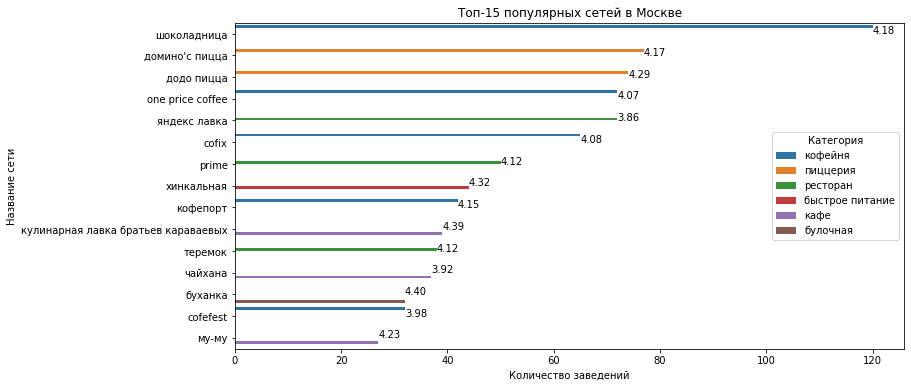

In [206]:
# Визуализация
plt.figure(figsize=(12, 6))

sns.barplot(data=top_chains,
            x='count',
            y='name',
            hue='category')


plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.title('Топ-15 популярных сетей в Москве')
plt.legend(title='Категория')

# Добавим значения среднего рейтинга
for index, row in top_chains.iterrows():
    plt.text(row['count'], index, f"{row['mean_rating']:.2f}", color='black')

plt.show()

**Вывод:** Самой популярной сетью является Шоколадница, она имеет 120 заведений в Москве, однако рейтинг у нее не самый высокий. Самый высокий рейтинг имеет сеть Буханка - 4.40. В топ-15 заведений треть составляют кофейни и только одна булочная.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


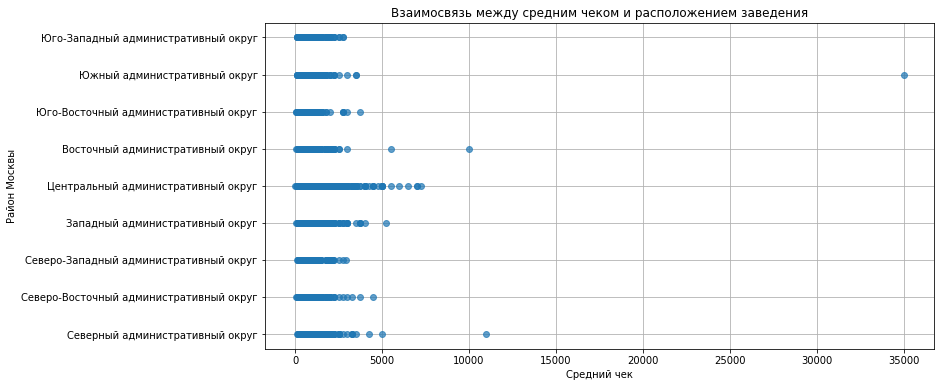

In [207]:
plt.figure(figsize=(12, 6))

# Строим график
plt.plot(rest_moscow['middle_avg_bill'],
         rest_moscow['district'],
         marker='o', 
         linestyle='', 
         alpha=0.7)

plt.title('Взаимосвязь между средним чеком и расположением заведения')
plt.xlabel('Средний чек')
plt.ylabel('Район Москвы')
plt.grid()


# Отображаем график
plt.show()

In [208]:
# Описательная статистика по административному округу
rest_moscow.groupby('district')['middle_avg_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Центральный административный округ,1060.0,1191.057547,920.014707,0.0,500.00,1000.0,1500.0,7250.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0


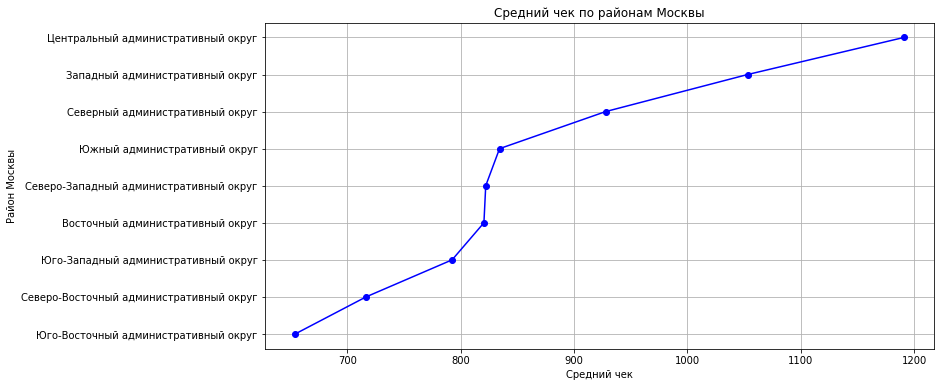

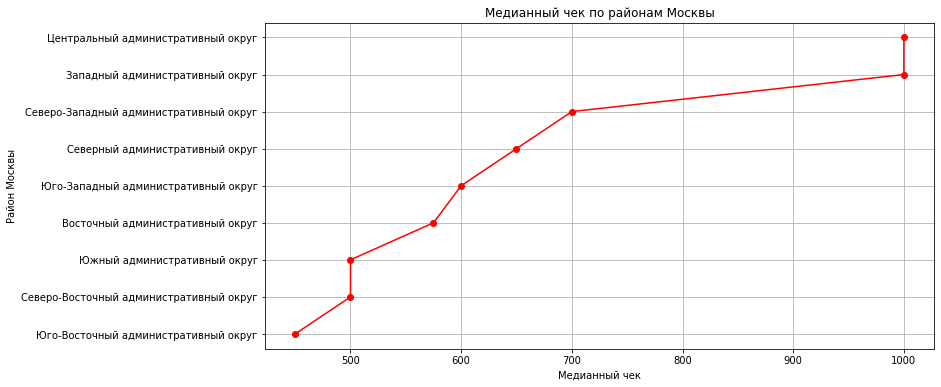

In [209]:
# Среднее значение среднего чека для каждого района
district_avg_bill = rest_moscow.groupby('district')['middle_avg_bill'].mean().sort_values()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(district_avg_bill.values, 
         district_avg_bill.index, 
         marker='o', 
         linestyle='-', 
         color='b')
plt.title('Средний чек по районам Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Район Москвы')
plt.grid()
plt.show()

# Медиану среднего чека для каждого района
district_median_bill = rest_moscow.groupby('district')['middle_avg_bill'].median().sort_values()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(district_median_bill.values, 
         district_median_bill.index, 
         marker='o', 
         linestyle='-', 
         color='r')
plt.title('Медианный чек по районам Москвы')
plt.xlabel('Медианный чек')
plt.ylabel('Район Москвы')
plt.grid()
plt.show()

**Вывод:** В Центральном административном округе Москвы нередко встречается средний чек свыше 5000, что не характерно для иных районов. Самый высокий средний чек в Центральном районе, самый низкий - в Восточном. В самых отдалённых округах (Юго-Восток, Северо-Восток) цены достигают самых низких значений, что связано с менее престижным статусом районов и меньшей концентрацией элитных заведений. Разница между средним и медианным чеком в некоторых округах (например, Южном) может быть связана с наличием дорогих заведений, которые сильно влияют на среднее значение.

---

### Задача 9

Изучим топ-15 улиц по количетву заведений.

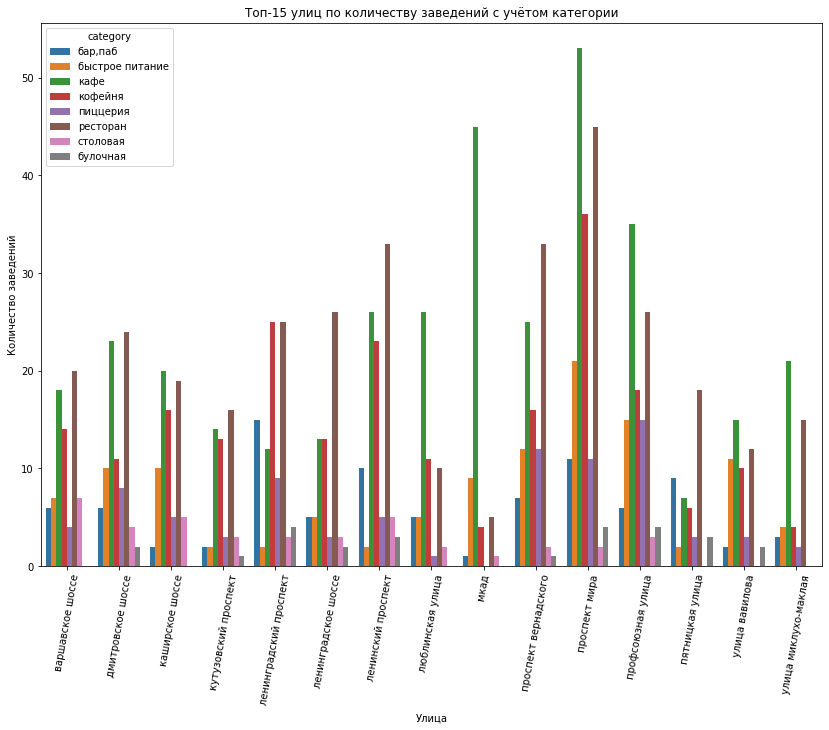

In [210]:
# Создадим столбец с названием улицы

rest_moscow['street'] = rest_moscow['address'].apply(lambda x: x.split(',')[1])

# Группируем данные по улицам и категориям, подсчитываем количество заведений
street_category_counts = rest_moscow.groupby(['street', 'category']).size().reset_index(name='count')

# Подсчитываем количество заведений по улицам
top_15_streets = rest_moscow['street'].value_counts().head(15).index
top_15_data = street_category_counts[street_category_counts['street'].isin(top_15_streets)]

# Визуализация
plt.figure(figsize=(14, 10))
sns.barplot(data=top_15_data,
            x='street', 
            y='count', 
            hue='category')

plt.title('Топ-15 улиц по количеству заведений с учётом категории')
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.xticks(rotation=80)

plt.show()

**Вывод:** Наибольшее количество заведений сосредоточне на улице Проспект Мира.
Самыми популярными являются рестораны, кафе и кофейни. Баров в топ-15 улиц больше всего на Ленинградском проспекте, а на Варшавском шоссе - столовых.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

- Наибольшее количество заведений в Москве - кафе (28%), рестораны (24%) и кофейни (17%). Наименее популярны булочные: они составляют всего 3% от общего числа заведений.

- Наибольшее количество заведений располагается в Центральном административном округе, в то время как в Северо-Западном - наименьшее количество. В Центральном административном округе преобладает количество рестораном, кафе и кофеен. В центральном округе Москвы сосредоточено наибольшее количество заведений, почти все бары находятся там. Мало заведений в северо-западном округе. По районам почти равномерно распределено количество ресторанов, кафе и кофеен.

- Несетевый заведений в Москве сильно больше сетевых. Наиболее популярны сетевые булочные, на втором месте по популярности находятся пиццерии. Среди несетевых заведений чаще встречаются бары.

- В среднем в заведениях около 108 посадочных мест. Выбросы присутствуют практически во всех категориях, особенно в таких как рестораны, столовые и кафе. Это может быть связано со спецификой заведений: работа навынос, крупные заведения, проводящие массовые мероприятие, незаполненность данных.

- У рейтинга пиццерий наименьшее стандартное отклонение (0.34) - это говорит о том, что посетители оценивают данную категорию более стабильно.

- Наибольшая корреляция наблюдается между рейтингом и ценовой категорией (0.28). Это значение показывает слабую связь. Это говорит о том, что заведения с более высокими ценами имеют тенденцию к получению более высокого рейтинга, однако сила связи остаётся умеренной.

- Самой популярной сетью является кофейня Шоколадница, по всей Москве она имеет аж 120 заведений. Среди 15 самых распространенных заведений наивысший рейтинг достигает булочная Буханка (4.4).

- Самый высокий средний чек в заведениях, котрые находятся в ЦАО. Центральный округ лидирует как по средним, так и по максимальным чекам. Чем дальше заведение находится от Центрального административного округа, тем ниже средний чек.

- Наибольшее количество заведений сосредоточне на улице Проспект Мира. Самыми популярными являются рестораны, кафе и кофейни. Несильно отстает по количеству заведений Профсоюзная улица, на ней много булочных по сравнению с другими.

<a class="anchor" id="4-bullet"></a>
## 4. Детальное исследование пиццерий

Проведите более детальное исследование заведений типа «пиццерия».
Ответьте на следующие вопросы:

---

### Задача 1

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

633


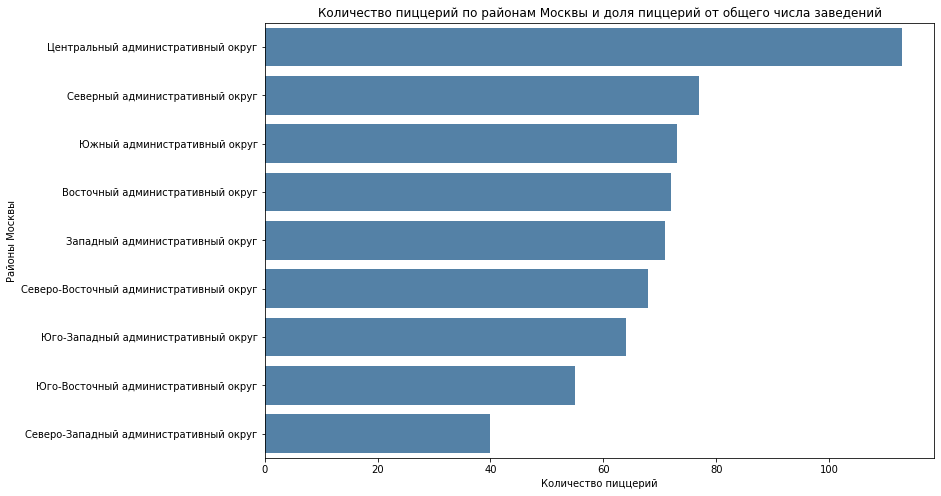

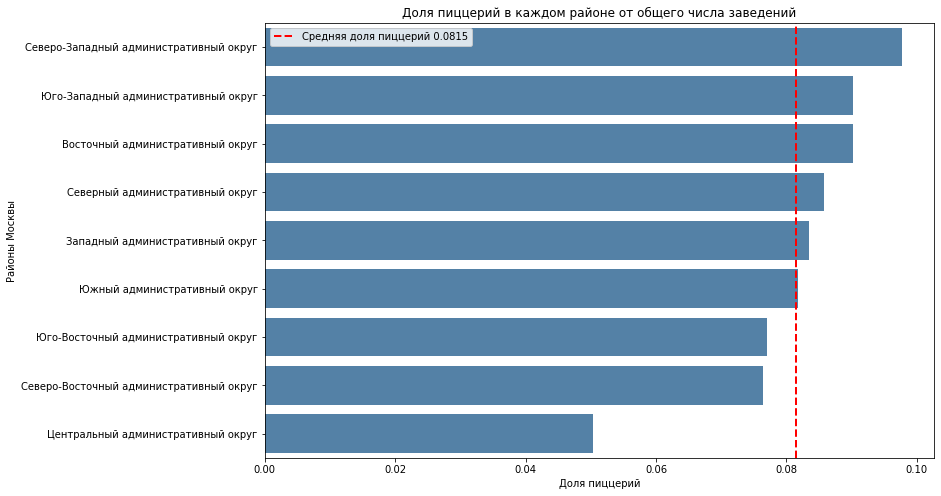

In [211]:
# Фильтруем пиццерии
pizzerias = rest_moscow[rest_moscow['category'] == 'пиццерия']

# Количество пиццерий
total_pizz = pizzerias.shape[0]

print(total_pizz)

# Количество заведений по районам
rest_by_district = rest_moscow.groupby('district').size()

# Количество пиццерий по районам
pizz_by_district = pizzerias.groupby('district').size()

# Долю пиццерий в каждом районе
pizz_share = (pizz_by_district / rest_by_district).fillna(0)

# Сортировка
sorted_pizz = pizz_by_district.sort_values(ascending=False)

# Среднюю долю пиццерий по районам
mean_pizz = pizz_share.mean()

# Визуализация для количества пиццерий по районам
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_pizz.values, y=sorted_pizz.index, color='steelblue')


plt.title('Количество пиццерий по районам Москвы и доля пиццерий от общего числа заведений')
plt.xlabel('Количество пиццерий')
plt.ylabel('Районы Москвы')

plt.show()

# Сортировка
sorted_pizz_share = pizz_share.sort_values(ascending=False)

# График доли пиццерий относительно всех заведений
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_pizz_share.values, 
            y=sorted_pizz_share.index, 
            color='steelblue')

# Добавляем линию с средним значением доли пиццерий
plt.axvline(mean_pizz, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Средняя доля пиццерий {round(mean_pizz, 4)}')


plt.title('Доля пиццерий в каждом районе от общего числа заведений')
plt.xlabel('Доля пиццерий')
plt.ylabel('Районы Москвы')
plt.legend()

plt.show()

Посмотрим на распределение пиццерий в каждом районе относительно общего количество пиццерий.

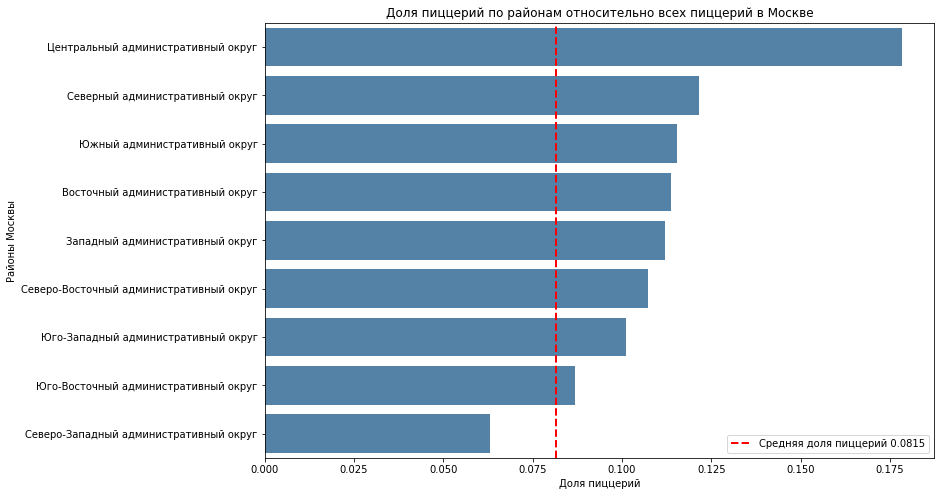

In [212]:
# Доля пиццерий в каждом районе относительно всех пиццерий
pizz_relative = (pizz_by_district / total_pizz).fillna(0)

sorted_pizz_relative = pizz_relative.sort_values(ascending=False)

# График доли пиццерий относительно всех пиццерий
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_pizz_relative.values, y=sorted_pizz_relative.index, color='steelblue')

# Добавляем линию с средним значением доли пиццерий
plt.axvline(mean_pizz, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Средняя доля пиццерий {round(mean_pizz, 4)}')

plt.title('Доля пиццерий по районам относительно всех пиццерий в Москве')
plt.xlabel('Доля пиццерий')
plt.ylabel('Районы Москвы')
plt.legend()
plt.show()

**Вывод:** Всего в Москве 633 пиццерии. Наибольшее количество таких заведений находится в Центральном административном округе, однако в этом районе доля пиццерий немного ниже среднего значения. Наименьшее количество пиццерий располагается в Северо-Западном административном округе.

---

### Задача 2

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [213]:
# Фильтруем данные по пиццериям
pizzerias = rest_moscow[rest_moscow['category'] == 'пиццерия']

# Создаем сводную таблицу для характеристики типовой пиццерии
pizzeria_pivot = pizzerias.pivot_table(
    index='category', 
    values=['seats', 'middle_avg_bill', 'rating', 'chain', 'is_24_7'], 
    aggfunc={
        'seats': 'mean',  
        'middle_avg_bill': 'mean',  
        'rating': 'mean',  
        'chain': lambda x: (x == 1).mean(),  
        'is_24_7': lambda x: (x == 1).mean()}).reset_index()

print(pizzeria_pivot)

   category     chain  is_24_7  middle_avg_bill    rating      seats
0  пиццерия  0.522907        1       789.377215  4.301264  94.496487


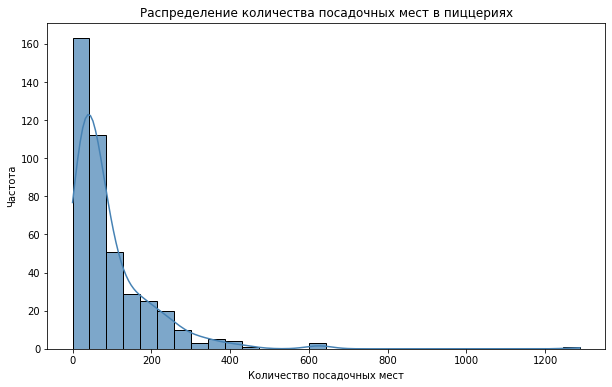

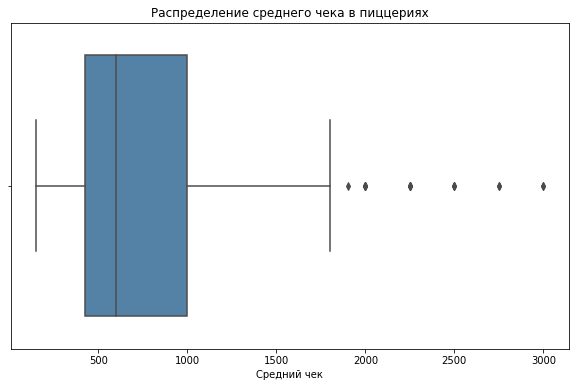

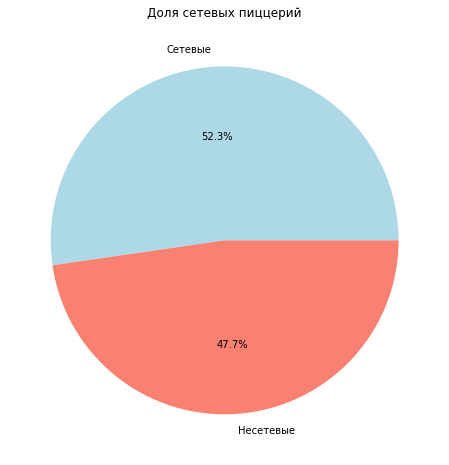

In [214]:
# ВИзуализация для посадочных мест
plt.figure(figsize=(10, 6))

sns.histplot(pizzerias['seats'], kde=True, bins=30, color='steelblue', alpha=0.7)
plt.title('Распределение количества посадочных мест в пиццериях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

plt.show()

# Визуализация для среднего чека
plt.figure(figsize=(10, 6))

sns.boxplot(x=pizzerias['middle_avg_bill'], color='steelblue')
plt.title('Распределение среднего чека в пиццериях')
plt.xlabel('Средний чек')

plt.show()

# Распределение сетевых и несетевых пиццерий
chain_p_counts = pizzerias['chain'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(chain_p_counts, 
        labels=['Сетевые', 'Несетевые'], 
        autopct='%1.1f%%', 
        colors=['lightblue', 'salmon'])
plt.title('Доля сетевых пиццерий')

plt.show()

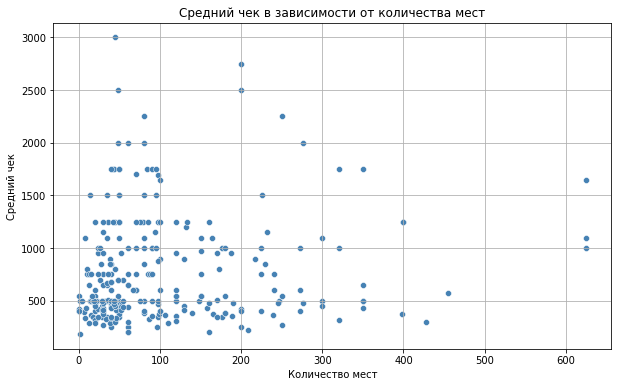

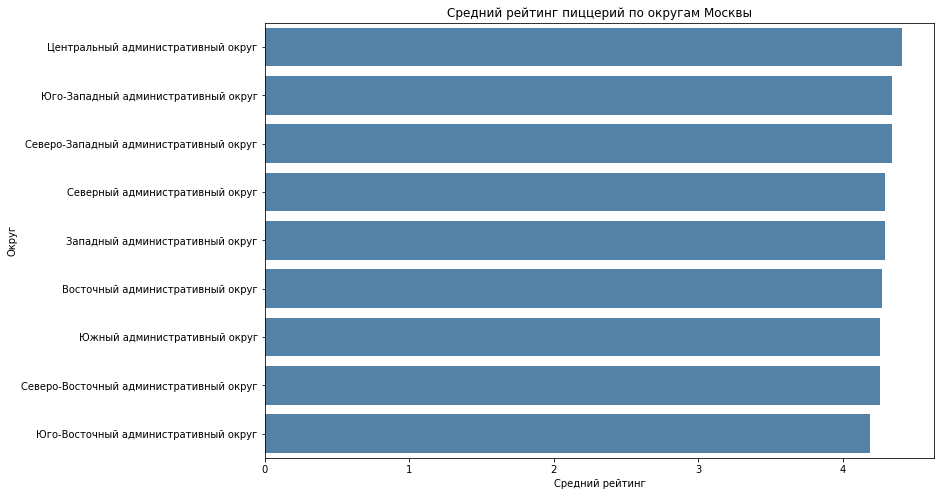

In [215]:
# Зависимость среднего чека от количества мест
plt.figure(figsize=(10, 6))

sns.scatterplot(x=pizzerias['seats'], y=pizzerias['middle_avg_bill'], color='steelblue')
plt.title('Средний чек в зависимости от количества мест')
plt.xlabel('Количество мест')
plt.ylabel('Средний чек')
plt.grid()

plt.show()

# Средний рейтинг по округам
district_rat = pizzerias.groupby('district')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=district_rat, y=district_rat.index, color='steelblue')
plt.title('Средний рейтинг пиццерий по округам Москвы')
plt.xlabel('Средний рейтинг')
plt.ylabel('Округ')

plt.show()

**Вывод:** Доля сетевых пиццерий составляет 52%. Немаловажный фактор - все пиццерии в городе являются круглосуточными. Средний чек составляет 789 рублей, а средний рейтинг 4.3, что является достаточно высоким показателем. Среднее количество посадочных мест в пиццериях составляет 94.5. Это значение указывает на то, что пиццерии в среднем имеют довольно просторные залы, что позволяет обслуживать большое количество клиентов одновременно

---

### Задача 3

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

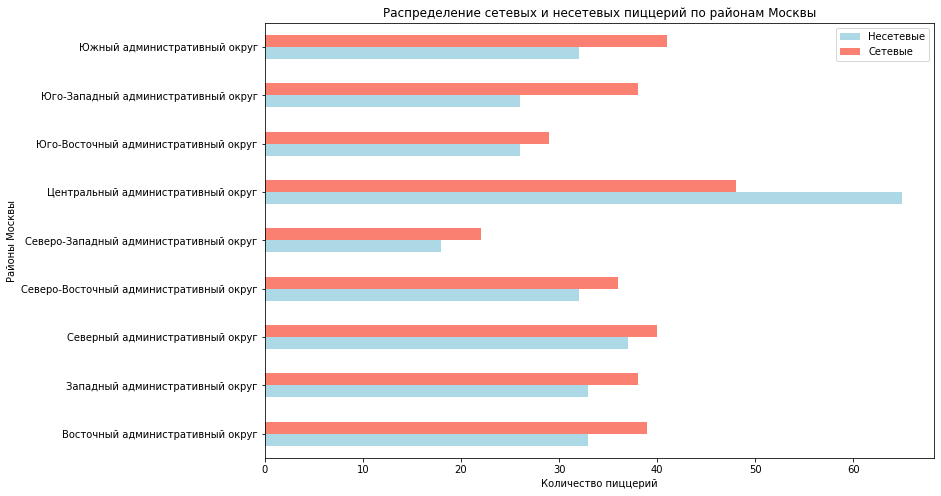

In [216]:
# Группируем пиццерии по округам и статусу сетевого заведения
pizzerias_chain = pizzerias.groupby(['district', 'chain']).size().unstack().fillna(0)

# Визуализация
pizzerias_chain.plot(kind='barh', 
                     figsize=(12, 8), 
                     color=['lightblue', 'salmon'])

plt.title('Распределение сетевых и несетевых пиццерий по районам Москвы')
plt.ylabel('Районы Москвы')
plt.xlabel('Количество пиццерий')
plt.xticks(rotation=0)
plt.legend(['Несетевые', 'Сетевые'])
plt.show()

**Вывод:** В основном преобладает количество сетевых пиццерий, только в ЦАО несетевых больше свыше чем на 10 заведений.

Диана Здесь тоже стоило изучить доли. Возможно кол-во больше из-за того, что заведений всех типов больше.
    
</div>

---

### Задача 4

Изучим как связан средний чек и рейтинг пиццерий, учитывая округ

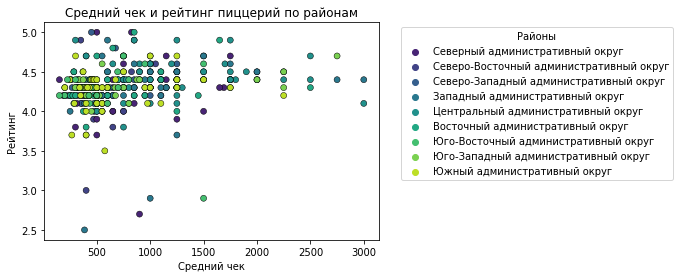

In [217]:
# Визуализация
# Группировка данных по районам
groupedd = pizzerias.groupby('district')[['middle_avg_bill', 'rating']].mean().reset_index()

# График
sns.scatterplot(data=pizzerias, 
                x='middle_avg_bill', 
                y='rating', 
                hue='district', 
                palette='viridis',
                edgecolor='k')

plt.title('Средний чек и рейтинг пиццерий по районам')
plt.xlabel('Средний чек')
plt.ylabel('Рейтинг')
plt.legend(title='Районы', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

**Вывод:** Северный, Северо-Западный и Центральный административные округа имеют более плотное распределение точек с рейтингами от 4.0 до 4.5 и средними чеками около 800–1000 рублей. В ЦАО часто встречаются пиццерии с более высоким средним чеком и при этом хорошим рейтингом.

Изучим как связан округ Москвы и рейтинг пиццерий

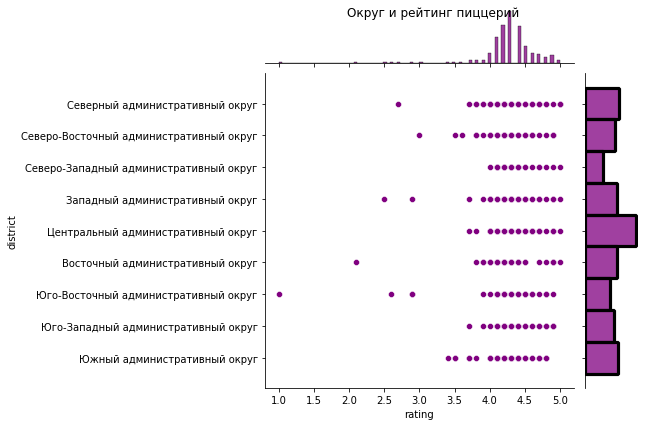

In [218]:
sns.jointplot(data=pizzerias, 
              x='rating', 
              y='district', 
              kind='scatter', 
              color='purple')

plt.yticks(rotation=45)

plt.suptitle('Округ и рейтинг пиццерий')
plt.show()

**Вывод:** В СЗАО самые хорошие показатели рейтинга, ни разу не встретилось значение меньше 4, однако в ЮВАО все не так хорошо, это единственный район, где встречается рейтинг, равный 1.

---

### Промежуточный вывод

Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Например, можно сделать акцент на районах или улицах. Или дать характеристику типичной пиццерии.

- В Москве всего 633 пиццерий. Больше всего их находится в ЦАО. Наибольшая доля пиццерий располагается в Северо-Западном административном округе.

- Чуть больше половины пиццерий города являются сетевыми. Высокий средний рейтинг подсказывает, что пиццерии хорошо справляются с обслуживанием клиентов, однако важно не снижать качество, чтобы сохранить или улучшить рейтинг.

- В ЦАО несетевых пиццерий немного больше чем сетевых, что сильно отличается от остальных округах. В оставшихся районах количество сетевых пиццерий преобладает.

- Низкий средний чек не означает, что в таком случае и рейтинг пиццерии будет низкий, однако есть шанс попасть в заведение с плохим рейтингом. В ЮВАО чаще чем в остальных районах встречаются пиццерии с низким рейтингом.

- Несетевую пиццерию лучше открывать в Юго-Восточном административном округе, так как там почти самая маленькая доля несетевых пиццерий. Меньше доля несетвых только в СЗАО, однако в этом районе самая высокая доля пиццерий по отношению ко всем заведениям, значит, конкуренция владельцев пиццерий будет весьма высокой. В ЮВАО доля пиццерий ниже средней доли относительно всех заведений.

<a class="anchor" id="5-bullet"></a>
## 5. Итоговый вывод

В ходе исследование проанализировано 8406 заведений Москвы. Данные включали информацию о названии заведения, категории, адресе, округе расположения, рабочих часа, рейтинге, количестве посадочные мест, категориях цен, средней стоимости заказа, среднем чеке и средней цене чашки капучино.

Изначально мы изучили данные и обработали их: провели оптимизацию типов данных, изучили пропуски и причины их возникновения, избавились от 0.05% дубликатов.

В ходе иследовательского анализа выяснили, что по-большей части распространены кафе и рестораны, количество пиццерий уступает в 4-5 раз. Изучили распределение заведений по административным районам Москвы - из этого узнали, что наибольшее количество заведения располагается в ЦАО, а наименьшее в СЗАО и ЮВАО. Также выяснили, что большая часть заведения не являются сетевыми, однако пиццерии чаще относятся к какой-нибудь сети (52%). Большинство заведений имеет не менее 200 посадочных мест, для пиццерий это значение в среднем меньше в 2 раза (94 места в среднем). По категориям заведений виднеется достаточно высокий средний рейтинг, что говорит о хорошем качество подаваемых блюд и высоких стандартах обслуживания. Среди пиццерий самой популярной сетью является домино'с пицца (80 заведений), однако сеть имеет рейтинг 4.17, что на 0.06 ниже среднего рейтинга по всем заведениям и на 0.13 ниже среднего рейтинга по пиццериям. В ЦАО значения среднего чека сильно выше, чем в остальных районах. В ЮВАО же редкость встретить заведение со средним чеком свыше 4000 рублей.

Количество пиццерий преобладает в ЦАО (свыше 130 заведений), меньше всего пиццерий в СЗАО и ЮВАО, однако в СЗАО самая высокая доля заведений данной категории. Заведения с самым высоким рейтингом и средним чеком располагаются в ЦАО, что не удивительно для района с высокой посещаемостью как местных жителей, так и туристов.


## Рекомендации

При открытии пиццерии стоит обратить внимание на Юго-Восточный округ Москвы.

- Всего 9% пиццерий Москвы располагается в ЮВАО, меньшее количество только в СЗАО, однако в этой районе и людей проживает меньше, а также стоит учитывать, что доля пиццерий, относительно всех заведений очень высокая.

- Исследование показало, что все пиццерии являются круглосуточными, поэтому открывать надо также круглосуточное заведение, чтобы не уменьшался спрос на него из-за нерабочих ночных часов.

- Количество сетевых пиццерий в рассматриваемом округе почти минимальное. Что хорошо для открытия нового заведения. Ведь чем меньше узнаваемых мест будет в районе, тем выше шанс, что люди обратят внимание на только открывшееся место.

- В ЮВАО в сравнении с другими административными округами Москвы чаще встречаются заведения с рейтингом меньше 3. Значит, люди с большим желанием, чем в случае открытия новой пиццерии в другом районе, испробуют новое место.

- Средний чек не должен сильно превышать значения этого показателя по пиццериям, поэтому рационально ориентироваться на 700-800 рублей.